In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [206]:
df=pd.read_csv("population.csv")
df

,Rank,State,Capital,% of Total Population,Males,Females,Sex Ratio,Literacy Rate (%),Rural Population,Urban Population,Density (1/km*km),Decadal Growth (%),Total Crime,Population2,Area (km*km)
0,1,Uttar Pradesh,Lucknow,16.50,"10,44,80,510","9,53,31,831",912,67.68,"15,51,11,022","4,44,70,455",828,20.10%,1858074,199812341,240928
1,2,Maharashtra,Mumbai,9.28,"5,82,43,056","5,41,31,277",929,82.34,"6,15,45,441","5,08,27,531",365,16.00%,2273436,112374333,307713
2,3,Bihar,Patna,8.60,"5,42,78,157","4,98,21,295",918,61.80,"9,20,75,028","1,17,29,609","1,102",25.10%,1346293,104099452,94163
3,4,West Bengal,Kolkata,7.54,"4,68,09,027","4,44,67,088",950,76.26,"6,22,13,676","2,91,34,060","1,030",13.90%,1119304,91276115,88752
4,5,Andhra Pradesh,Hyderabad,6.99,"4,24,42,146","4,21,38,631",993,67.02,"5,63,61,702","2,82,19,075",308,10.98%,2018981,84580777,275045
5,6,Madhya Pradesh,Bhopal,6.00,"3,76,12,306","3,50,14,503",931,69.32,"5,25,37,899","2,00,59,666",236,20.30%,2413770,72626809,308245
6,7,Tamil Nadu,Chennai,5.96,"3,61,37,975","3,60,09,055",996,80.09,"3,71,89,229","3,49,49,729",555,15.60%,2060176,72147030,130058
7,8,Rajasthan,Jaipur,5.66,"3,55,50,997","3,29,97,440",928,66.11,"5,15,40,236","1,70,80,776",201,21.40%,1855916,68548437,342239
8,9,Karnataka,Bengaluru,5.05,"3,09,66,657","3,01,28,640",973,75.36,"3,75,52,529","2,35,78,175",319,15.70%,1481063,61095297,191791
9,10,Gujarat,Gandhinagar,4.99,"3,14,91,260","2,89,48,432",919,78.03,"3,46,70,817","2,57,12,811",308,19.20%,1385775,60439692,196024


In [207]:
df.shape

(35, 15)

In [208]:
df.columns

Index(['Rank', 'State', 'Capital', '% of Total Population', 'Males', 'Females',
       'Sex Ratio', 'Literacy Rate (%)', 'Rural Population',
       'Urban Population', 'Density (1/km*km)', 'Decadal Growth (%)',
       'Total Crime', 'Population2', 'Area (km*km)'],
      dtype='object')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   35 non-null     int64  
 1   State                  35 non-null     object 
 2   Capital                34 non-null     object 
 3   % of Total Population  35 non-null     float64
 4   Males                  35 non-null     object 
 5   Females                35 non-null     object 
 6   Sex Ratio              35 non-null     object 
 7   Literacy Rate (%)      35 non-null     float64
 8   Rural Population       35 non-null     object 
 9   Urban Population       35 non-null     object 
 10  Density (1/km*km)      35 non-null     object 
 11  Decadal Growth (%)     35 non-null     object 
 12  Total Crime            35 non-null     int64  
 13  Population2            35 non-null     int64  
 14  Area (km*km)           35 non-null     int64  
dtypes: float

In [210]:
df.isnull().sum()

Rank                     0
State                    0
Capital                  1
% of Total Population    0
Males                    0
Females                  0
Sex Ratio                0
Literacy Rate (%)        0
Rural Population         0
Urban Population         0
Density (1/km*km)        0
Decadal Growth (%)       0
Total Crime              0
Population2              0
Area (km*km)             0
dtype: int64

In [211]:
df.describe()

,Rank,% of Total Population,Literacy Rate (%),Total Crime,Population2,Area (km*km)
count,35.000000,35.000000,35.000000,3.500000e+01,3.500000e+01,35.000000
mean,18.000000,2.856857,77.940286,6.768291e+05,3.459203e+07,93921.171429
std,10.246951,3.671943,8.598837,7.943936e+05,4.445516e+07,103754.363757
min,1.000000,0.010000,61.800000,7.430000e+02,6.447300e+04,32.000000
25%,9.500000,0.115000,71.235000,2.985150e+04,1.421136e+06,9367.500000
50%,18.000000,1.390000,78.030000,3.815400e+05,1.678794e+07,53483.000000
75%,26.500000,5.020000,85.950000,1.366034e+06,6.076749e+07,145449.000000
max,35.000000,16.500000,94.000000,2.413770e+06,1.998123e+08,342239.000000


In [212]:
a = pd.DataFrame(df.loc[:,["Literacy Rate (%)","State","Total Crime"]])
a

,Literacy Rate (%),State,Total Crime
0,67.68,Uttar Pradesh,1858074
1,82.34,Maharashtra,2273436
2,61.80,Bihar,1346293
3,76.26,West Bengal,1119304
4,67.02,Andhra Pradesh,2018981
5,69.32,Madhya Pradesh,2413770
6,80.09,Tamil Nadu,2060176
7,66.11,Rajasthan,1855916
8,75.36,Karnataka,1481063
9,78.03,Gujarat,1385775


In [213]:
max_crime = a.sort_values(by=['Total Crime'],ascending=False)
max_crime

,Literacy Rate (%),State,Total Crime
5,69.32,Madhya Pradesh,2413770
1,82.34,Maharashtra,2273436
6,80.09,Tamil Nadu,2060176
4,67.02,Andhra Pradesh,2018981
0,67.68,Uttar Pradesh,1858074
7,66.11,Rajasthan,1855916
8,75.36,Karnataka,1481063
11,94.00,Kerala,1437459
9,78.03,Gujarat,1385775
2,61.80,Bihar,1346293


In [214]:
min_crime = a.sort_values(by=['Total Crime'],ascending=True)
min_crime

,Literacy Rate (%),State,Total Crime
34,91.85,Lakshadweep,743
33,87.10,Daman and Diu,2948
32,76.24,Dadra and Nagar Haveli,4651
30,81.42,Sikkim,7000
31,86.63,Andaman and Nicobar Islands,9102
24,79.55,Nagaland,13133
22,74.43,Meghalaya,25249
28,91.33,Mizoram,26146
26,65.38,Arunachal Pradesh,27652
25,88.70,Goa,32051


In [215]:
max_crime=max_crime.head(10)
max_crime

,Literacy Rate (%),State,Total Crime
5,69.32,Madhya Pradesh,2413770
1,82.34,Maharashtra,2273436
6,80.09,Tamil Nadu,2060176
4,67.02,Andhra Pradesh,2018981
0,67.68,Uttar Pradesh,1858074
7,66.11,Rajasthan,1855916
8,75.36,Karnataka,1481063
11,94.00,Kerala,1437459
9,78.03,Gujarat,1385775
2,61.80,Bihar,1346293


In [216]:
min_crime=min_crime.head(10)
min_crime

,Literacy Rate (%),State,Total Crime
34,91.85,Lakshadweep,743
33,87.10,Daman and Diu,2948
32,76.24,Dadra and Nagar Haveli,4651
30,81.42,Sikkim,7000
31,86.63,Andaman and Nicobar Islands,9102
24,79.55,Nagaland,13133
22,74.43,Meghalaya,25249
28,91.33,Mizoram,26146
26,65.38,Arunachal Pradesh,27652
25,88.70,Goa,32051


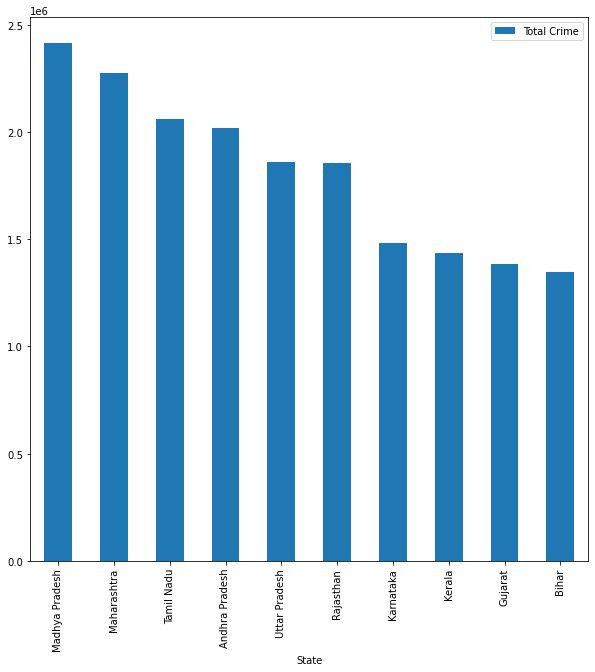

In [217]:

max_crime.plot(x="State", y=["Total Crime"],kind="bar", figsize=(10, 10))
plt.show()

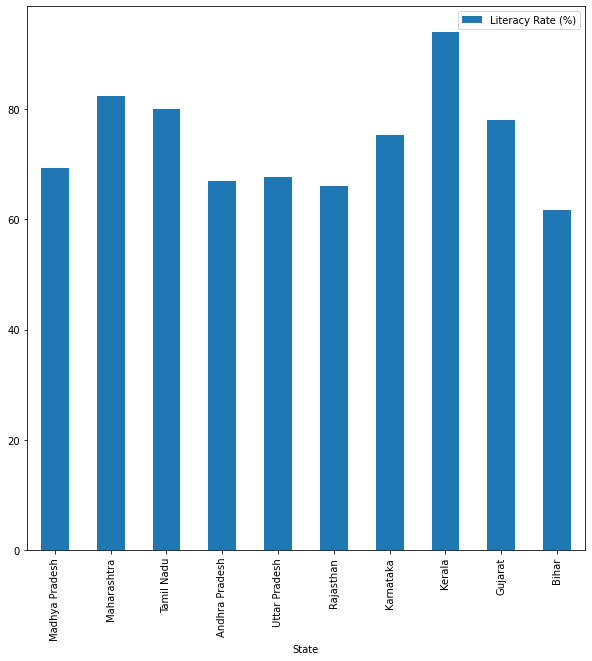

In [218]:
max_crime.plot(x="State", y=["Literacy Rate (%)"],kind="bar", figsize=(10, 10))
plt.show()

<AxesSubplot:>

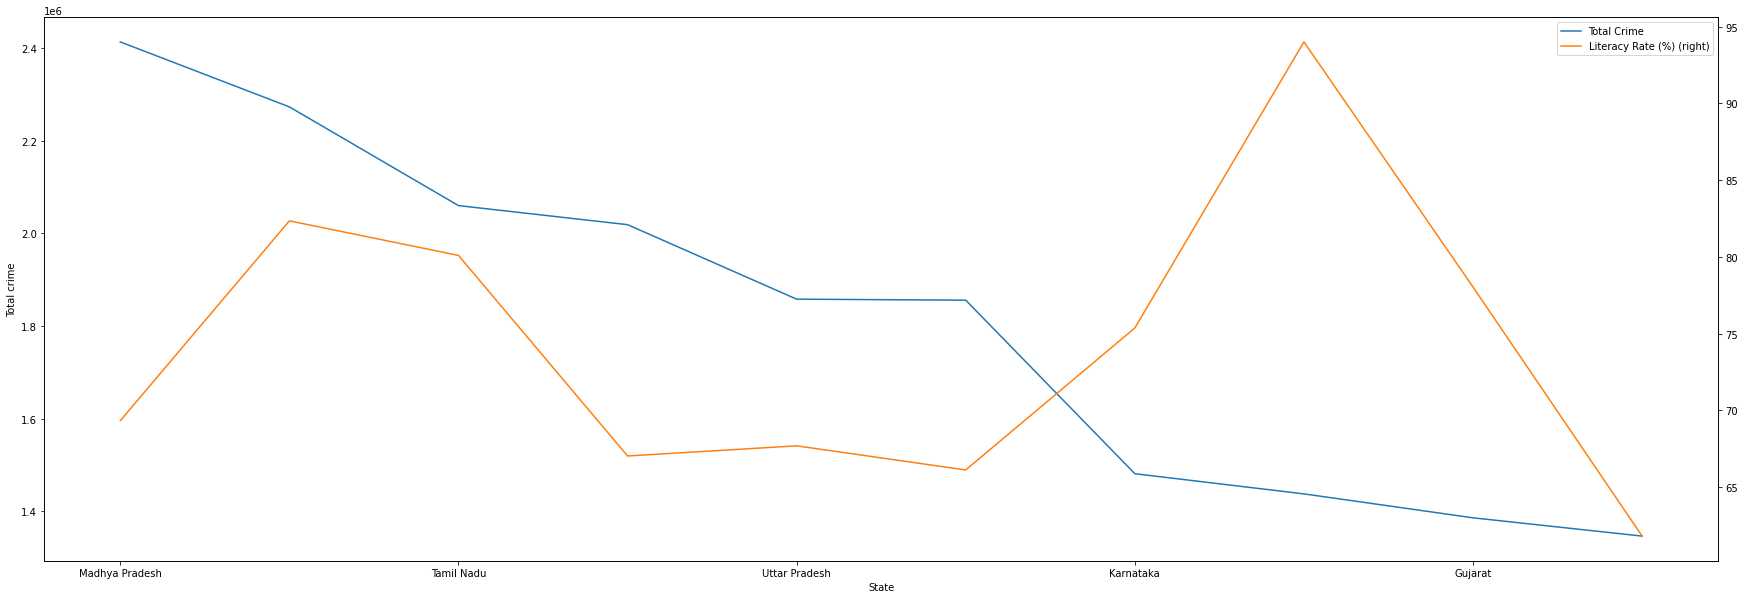

In [219]:
fig, ax = plt.subplots(figsize=(30,10))

max_crime.plot(x="State", y="Total Crime", ylabel = "Total crime", ax=ax)
max_crime.plot(x="State",y="Literacy Rate (%)",ax=ax, secondary_y=True)


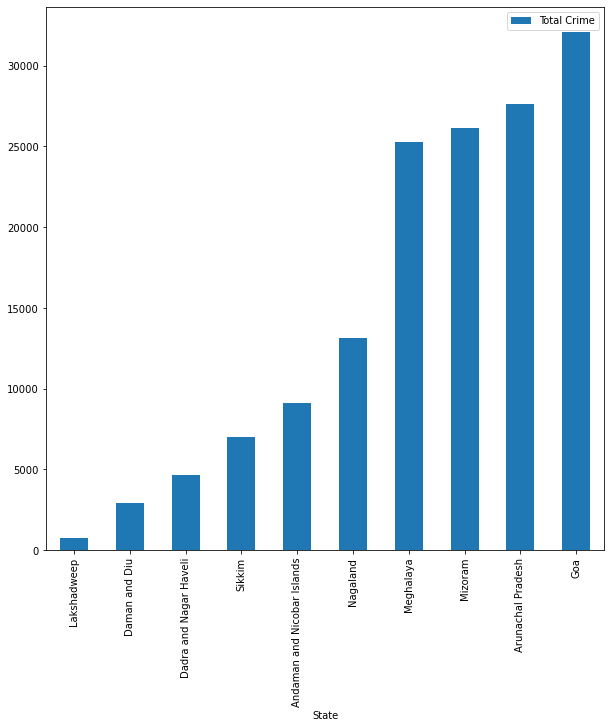

In [220]:
min_crime.plot(x="State", y=["Total Crime"],kind="bar", figsize=(10, 10))
plt.show()

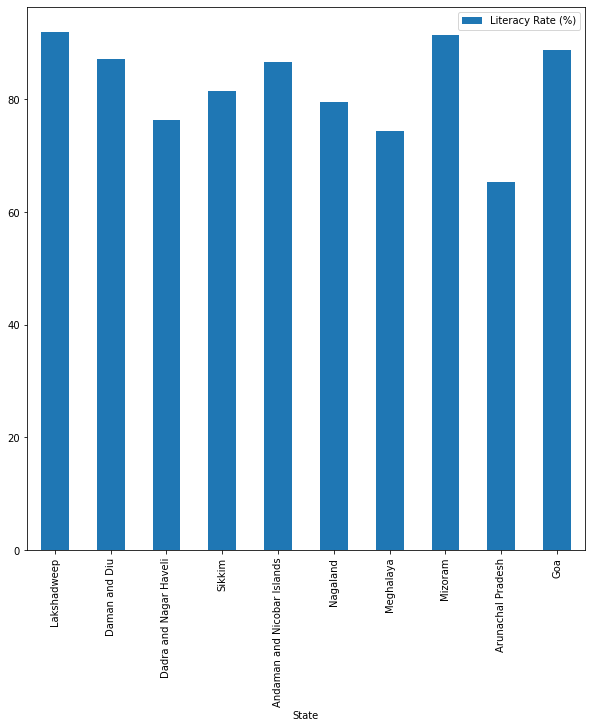

In [221]:
min_crime.plot(x="State", y=["Literacy Rate (%)"],kind="bar", figsize=(10, 10))
plt.show()

<AxesSubplot:>

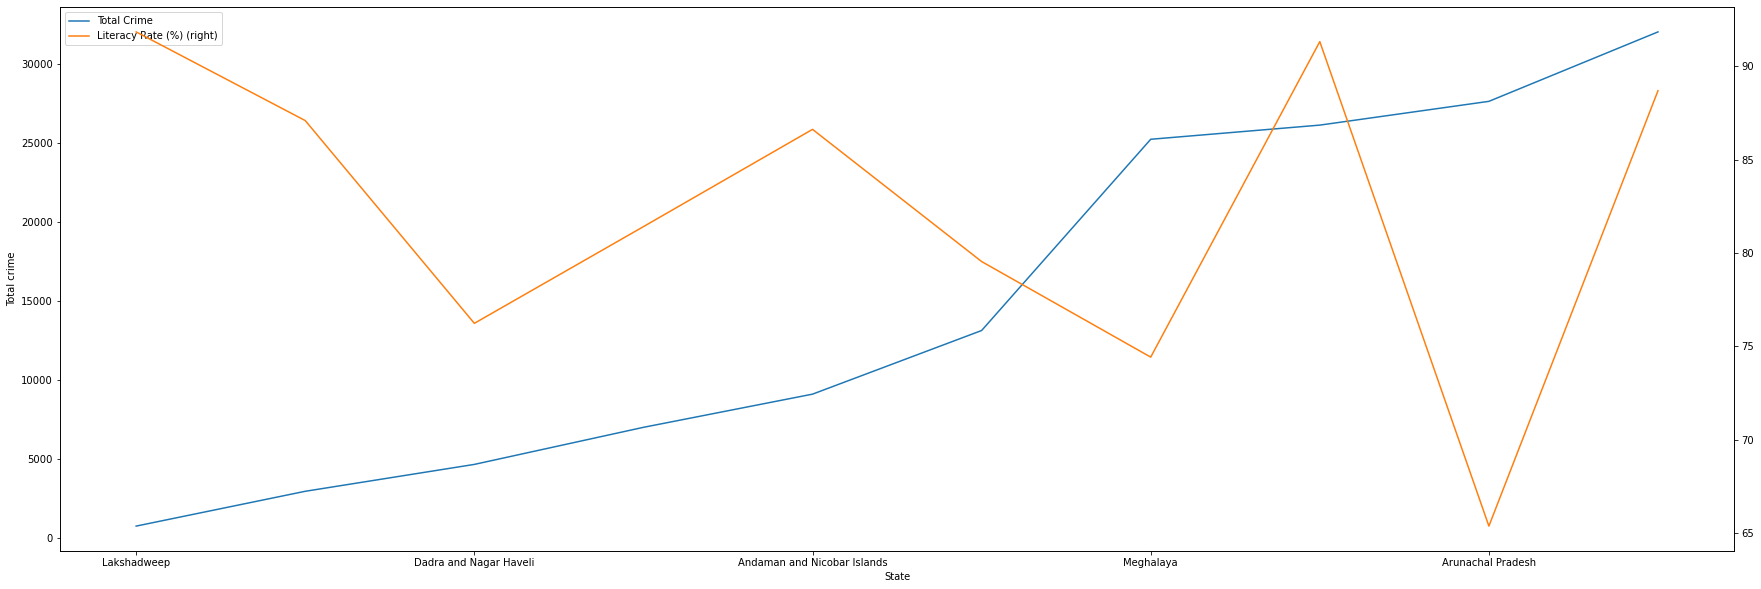

In [222]:
fig, ax = plt.subplots(figsize=(30,10))

min_crime.plot(x="State", y="Total Crime", ylabel = "Total crime", ax=ax)
min_crime.plot(x="State",y="Literacy Rate (%)",ax=ax, secondary_y=True)


2.3	Analysis of year-on-year total crime rate.

2.4	 Analysis of area vs overall crime

In [234]:
k=pd.DataFrame(df.loc[:,["State","Area (km*km)","Total Crime"]])
k

,State,Area (km*km),Total Crime
0,Uttar Pradesh,240928,1858074
1,Maharashtra,307713,2273436
2,Bihar,94163,1346293
3,West Bengal,88752,1119304
4,Andhra Pradesh,275045,2018981
5,Madhya Pradesh,308245,2413770
6,Tamil Nadu,130058,2060176
7,Rajasthan,342239,1855916
8,Karnataka,191791,1481063
9,Gujarat,196024,1385775


In [239]:
max_crime_area = k.sort_values(by=['Total Crime'],ascending=False)
max_crime_area

,State,Area (km*km),Total Crime
5,Madhya Pradesh,308245,2413770
1,Maharashtra,307713,2273436
6,Tamil Nadu,130058,2060176
4,Andhra Pradesh,275045,2018981
0,Uttar Pradesh,240928,1858074
7,Rajasthan,342239,1855916
8,Karnataka,191791,1481063
11,Kerala,38863,1437459
9,Gujarat,196024,1385775
2,Bihar,94163,1346293


In [240]:
max_crime_area.head()

,State,Area (km*km),Total Crime
5,Madhya Pradesh,308245,2413770
1,Maharashtra,307713,2273436
6,Tamil Nadu,130058,2060176
4,Andhra Pradesh,275045,2018981
0,Uttar Pradesh,240928,1858074


In [241]:
min_crime_area = k.sort_values(by=['Total Crime'],ascending=True)
min_crime_area

,State,Area (km*km),Total Crime
34,Lakshadweep,32,743
33,Daman and Diu,112,2948
32,Dadra and Nagar Haveli,491,4651
30,Sikkim,7096,7000
31,Andaman and Nicobar Islands,8249,9102
24,Nagaland,16579,13133
22,Meghalaya,22429,25249
28,Mizoram,21081,26146
26,Arunachal Pradesh,83743,27652
25,Goa,3702,32051


In [242]:
min_crime_area.head()

,State,Area (km*km),Total Crime
34,Lakshadweep,32,743
33,Daman and Diu,112,2948
32,Dadra and Nagar Haveli,491,4651
30,Sikkim,7096,7000
31,Andaman and Nicobar Islands,8249,9102


<AxesSubplot:>

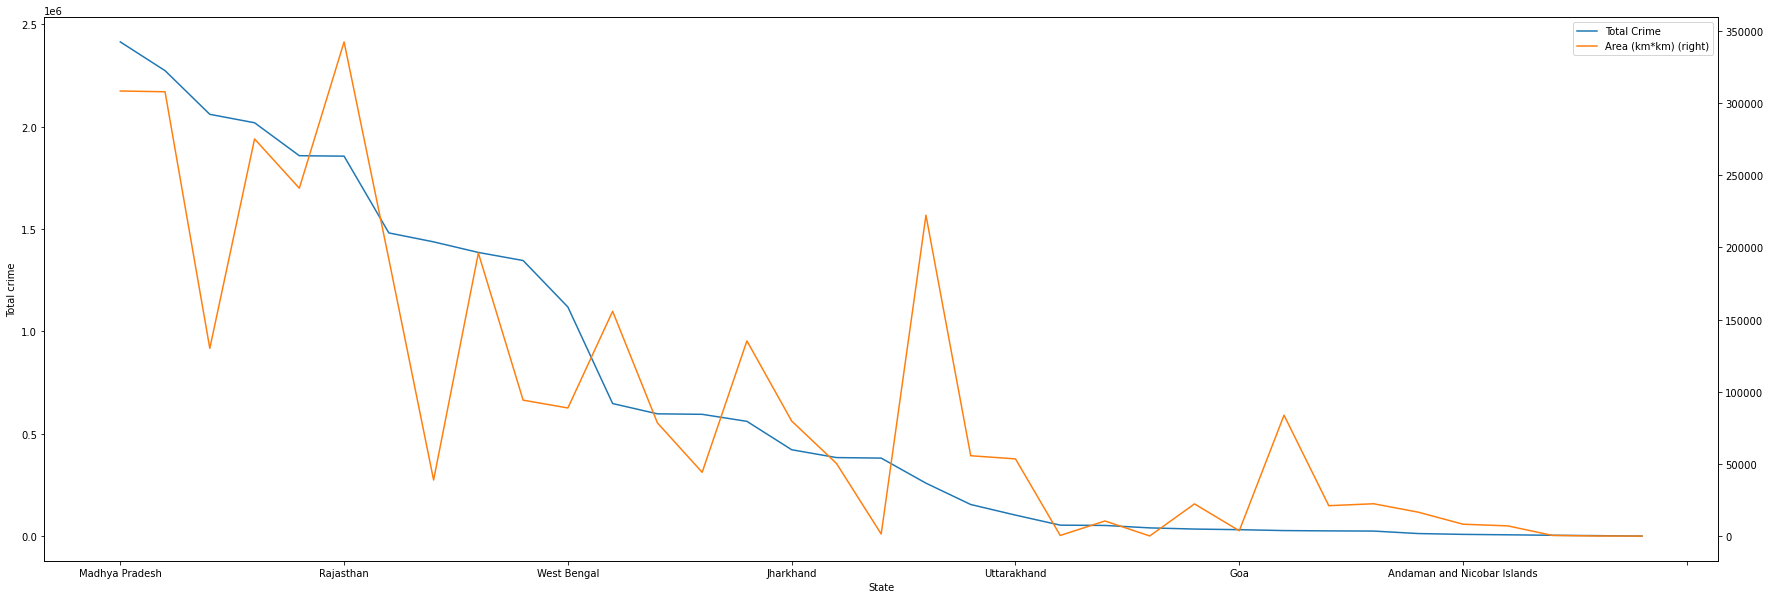

In [243]:
fig, ax = plt.subplots(figsize=(30,10))

max_crime_area.plot(x="State", y="Total Crime", ylabel = "Total crime", ax=ax)
max_crime_area.plot(x="State",y="Area (km*km)",ax=ax, secondary_y=True)

<AxesSubplot:>

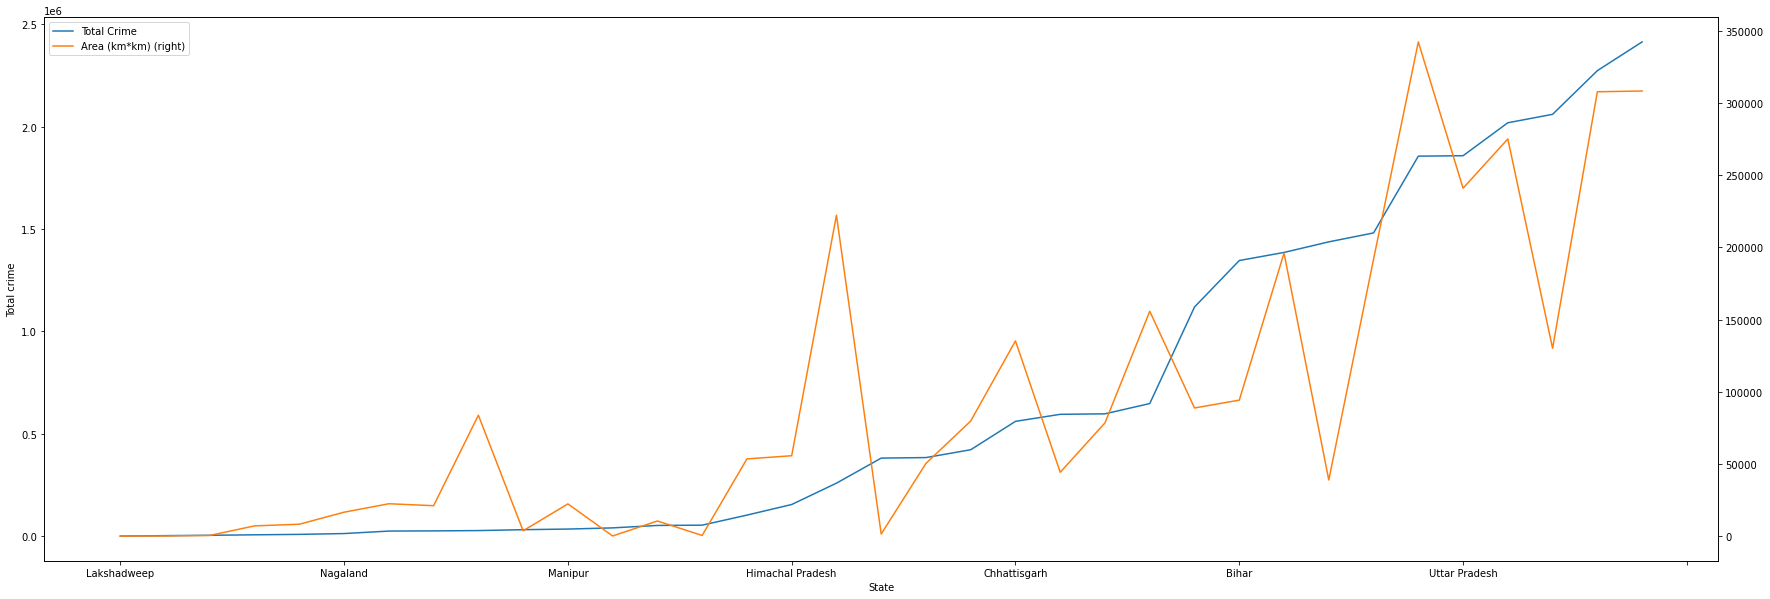

In [244]:
fig, ax = plt.subplots(figsize=(30,10))

min_crime_area.plot(x="State", y="Total Crime", ylabel = "Total crime", ax=ax)
min_crime_area.plot(x="State",y="Area (km*km)",ax=ax, secondary_y=True)

2.5	 Analysis of Population vs overall Crime



In [223]:
b = pd.DataFrame(df.loc[:,["State","Population2","Total Crime"]])
b

,State,Population2,Total Crime
0,Uttar Pradesh,199812341,1858074
1,Maharashtra,112374333,2273436
2,Bihar,104099452,1346293
3,West Bengal,91276115,1119304
4,Andhra Pradesh,84580777,2018981
5,Madhya Pradesh,72626809,2413770
6,Tamil Nadu,72147030,2060176
7,Rajasthan,68548437,1855916
8,Karnataka,61095297,1481063
9,Gujarat,60439692,1385775


In [224]:
max_crime_pop = b.sort_values(by=['Total Crime'],ascending=False)
max_crime_pop

,State,Population2,Total Crime
5,Madhya Pradesh,72626809,2413770
1,Maharashtra,112374333,2273436
6,Tamil Nadu,72147030,2060176
4,Andhra Pradesh,84580777,2018981
0,Uttar Pradesh,199812341,1858074
7,Rajasthan,68548437,1855916
8,Karnataka,61095297,1481063
11,Kerala,33406061,1437459
9,Gujarat,60439692,1385775
2,Bihar,104099452,1346293


In [225]:
max_crime_pop.head()

,State,Population2,Total Crime
5,Madhya Pradesh,72626809,2413770
1,Maharashtra,112374333,2273436
6,Tamil Nadu,72147030,2060176
4,Andhra Pradesh,84580777,2018981
0,Uttar Pradesh,199812341,1858074


In [226]:
min_crime_pop = b.sort_values(by=['Total Crime'],ascending=True)
min_crime_pop

,State,Population2,Total Crime
34,Lakshadweep,64473,743
33,Daman and Diu,243247,2948
32,Dadra and Nagar Haveli,343709,4651
30,Sikkim,610577,7000
31,Andaman and Nicobar Islands,380581,9102
24,Nagaland,1978502,13133
22,Meghalaya,2966889,25249
28,Mizoram,1097206,26146
26,Arunachal Pradesh,1383727,27652
25,Goa,1458545,32051


In [227]:
min_crime_pop =min_crime_pop.head()
min_crime_pop

,State,Population2,Total Crime
34,Lakshadweep,64473,743
33,Daman and Diu,243247,2948
32,Dadra and Nagar Haveli,343709,4651
30,Sikkim,610577,7000
31,Andaman and Nicobar Islands,380581,9102


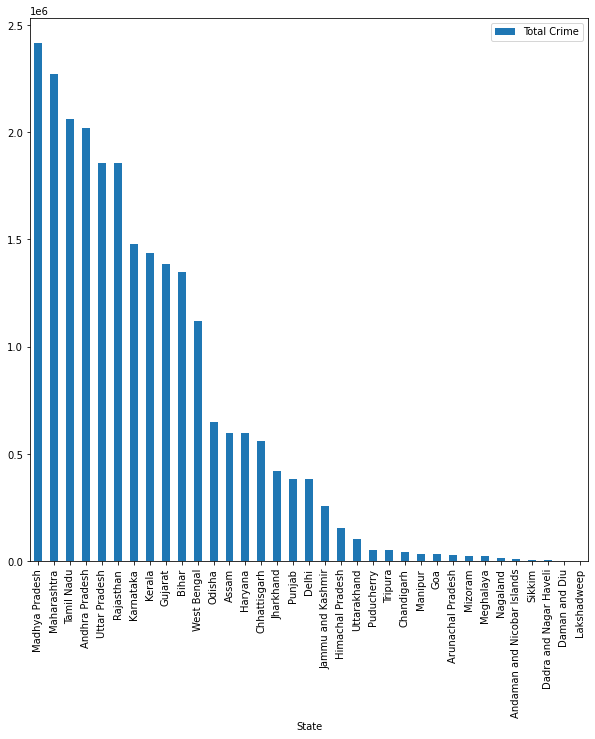

In [228]:
max_crime_pop.plot(x="State", y=["Total Crime"],kind="bar", figsize=(10, 10))
plt.show()

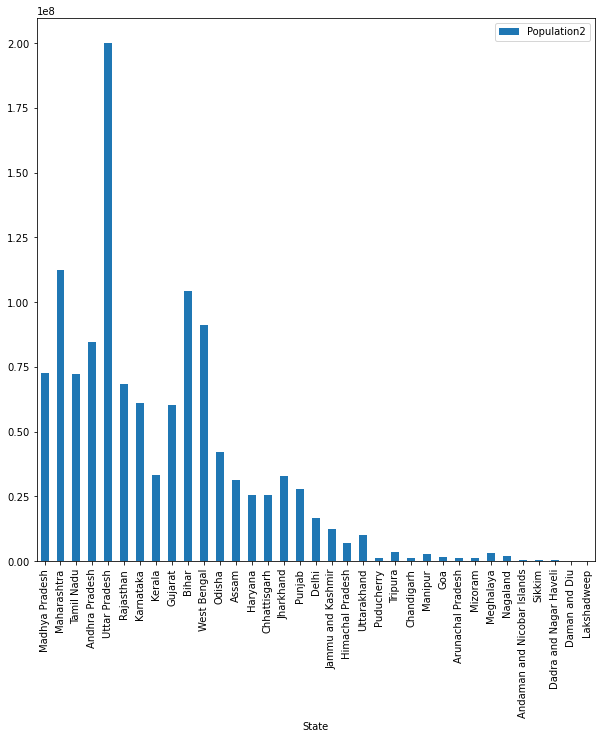

In [229]:
max_crime_pop.plot(x="State", y=["Population2"],kind="bar", figsize=(10, 10))
plt.show()

<AxesSubplot:>

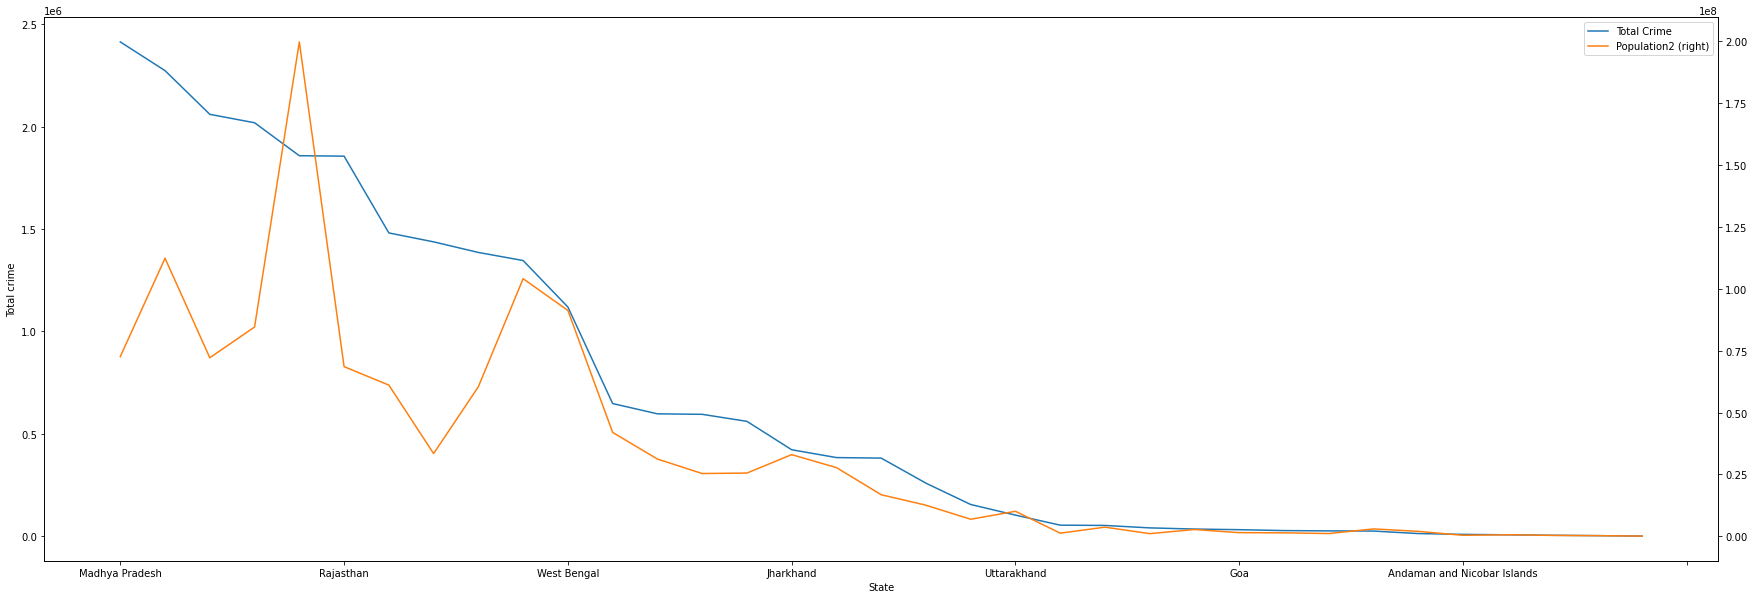

In [230]:
fig, ax = plt.subplots(figsize=(30,10))

max_crime_pop.plot(x="State", y="Total Crime", ylabel = "Total crime", ax=ax)
max_crime_pop.plot(x="State",y="Population2",ax=ax, secondary_y=True)

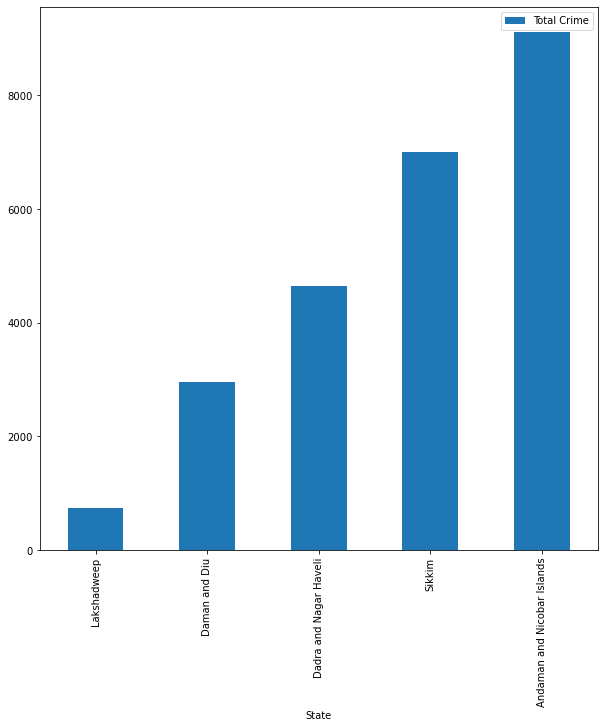

In [231]:
min_crime_pop.plot(x="State", y=["Total Crime"],kind="bar", figsize=(10, 10))
plt.show()

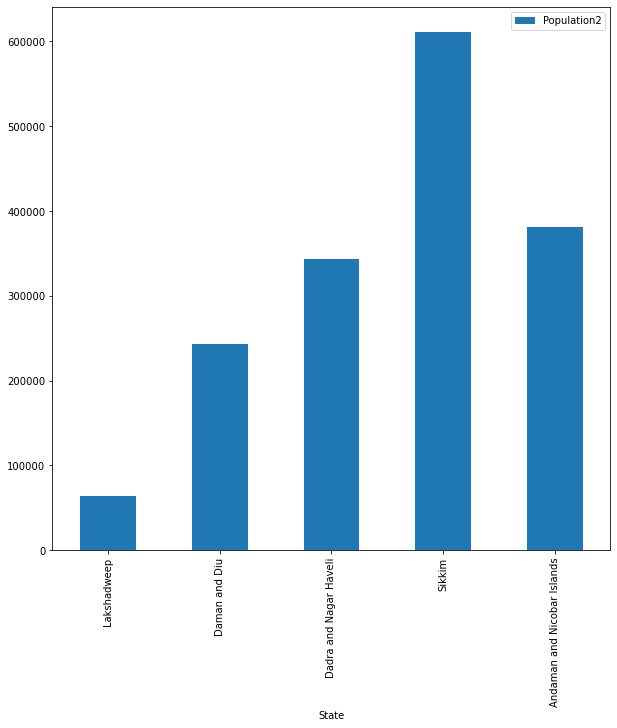

In [232]:
min_crime_pop.plot(x="State", y=["Population2"],kind="bar", figsize=(10, 10))
plt.show()

<AxesSubplot:>

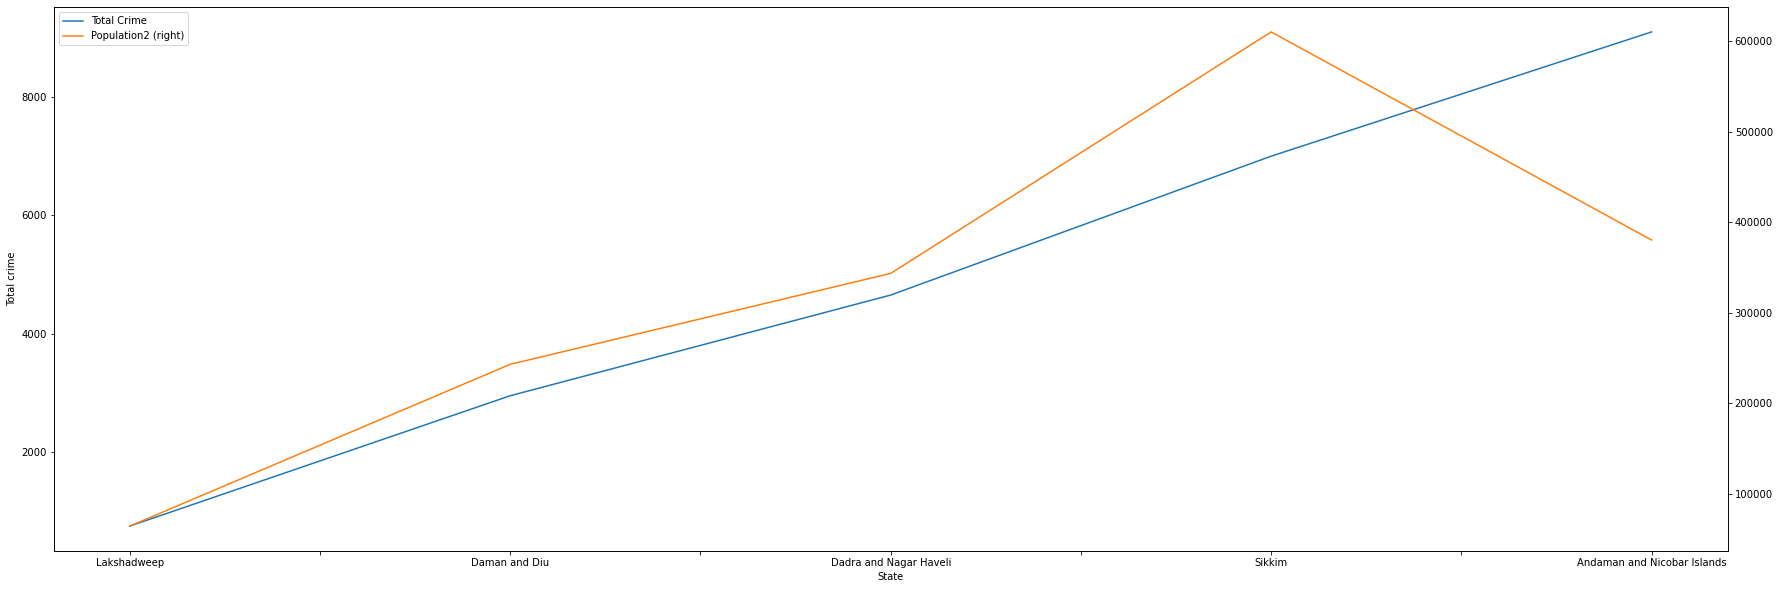

In [233]:
fig, ax = plt.subplots(figsize=(30,10))

min_crime_pop.plot(x="State", y="Total Crime", ylabel = "Total crime", ax=ax)
min_crime_pop.plot(x="State",y="Population2",ax=ax, secondary_y=True)
